# 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, stats
from scipy.optimize import minimize_scalar
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

%precision 3

'%.3f'

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = 'data/미적분관계1.jpg' STYLE='width 100px;'>
<img src = 'data/미적분관계3.jpg' STYLE='width 100px;'>
<img src = 'data/미적분식.jpg' STYLE='width 100px;'>

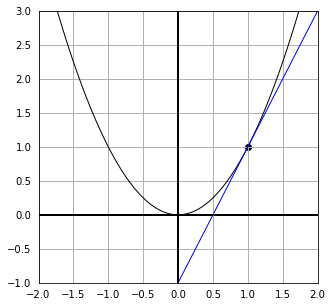

In [10]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1 => 적분의 하방면적
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

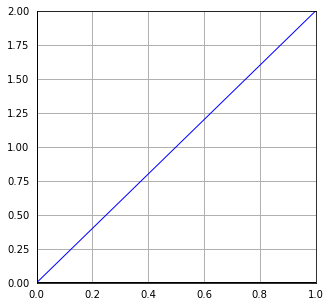

In [9]:
# 위를 미분
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

## 1. 1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.
<img src = 'data/밀도함수식.jpg' STYLE='width 100px;'>

- 과제 0829_1.
p173~180 예제 풀기

### 1) 확률밀도함수

In [13]:
# 불공정한 룰렛
x_range = np.array([0,1])

# 확률분포 => x_range와 f
# x배열사이에 있는 값들은 *2
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

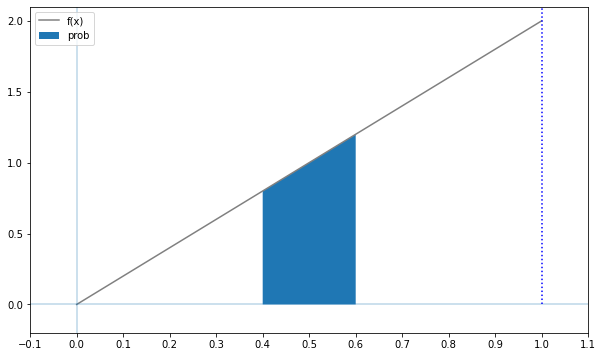

In [17]:
X=[x_range, f]

# 0.4~0.6사이의 값을 취할 확률
# 0과 1사이
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# f(x) 그래프 (y = 2x)
ax.plot(xs, [f(x) for x in xs],label = 'f(x)', color = 'gray')
ax.hlines(0, -0.2, 1.2, alpha = 0.3)
ax.vlines(0, -0.2, 2.2, alpha = 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles = ':', color = 'blue')

# 0.4~ 0.6 x좌표 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x 축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label = 'prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()
plt.show()

- 0.4와 0.6사이 값들을 100으로 쪼개 그 사이 값들에 색이 칠해짐 
- y = 2x 그래프 f(x)에서 0.4~0.6 사이 영역을 나타냄

In [29]:
# 적분으로 추출=> integrate의 quad 함수 사용 (적분값과 추정오차를 반환)
# integrate.quad(피적분함수, 적분범위 a, b)
a, b = integrate.quad(f, 0.4, 0.6)
print('적분값', round(a, 1))
print('추정오차', round(b))

적분값 0.2
추정오차 0


- 적분값 = 확률

- 연속형 확률의 성질
  - f(x) >= 0
  - f(x)를 +-무한대로 적분 = 1

In [35]:
# 증명 

# 1번째 성질 (f(x) = 0)
from scipy.optimize import minimize_scalar
# minimize_scalar => 함수의 최솟값 반환
res = minimize_scalar(f)
# 함수의 최솟값은 fum이라는 인스턴스 변수에
res.fun

0

In [36]:
# 2번째 성질
# f(x)그래프 삼각형의 면적이 1을 의미
# np.inf => 무한대를 의미
integrate.quad(f, -np.inf, np.inf)

(1.000, 0.000)

### 2) 누적분포함수 : F(x)
  - 확률변수 X가 x 이하가 될 때의 확률을 반환하는 함수
  - x의 범위 : X<=x

In [37]:
# 분포함수
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [40]:
# 예시 
# 룰렛이 0.4~0.6사이의 값을 취할 확률
# F(0.6)-F(0.4)
a = round(F(0.6), 1)
b = round(F(0.4), 1)
print(f'x가 0.6일 때 분포함수: {a}, x가 0.4일 때 분포함수: {b}, 두 값 사이 확률: {a-b}')

x가 0.6일 때 분포함수: 0.4, x가 0.4일 때 분포함수: 0.2, 두 값 사이 확률: 0.2


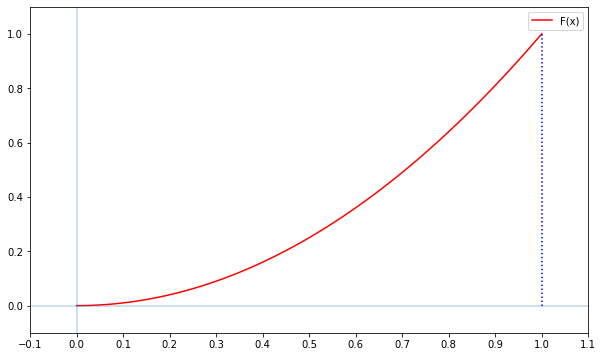

In [42]:
# 분포함수 그래프
x_range = np.array([0,1])

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label = 'F(x)', color = 'red')
ax.hlines(0, -0.1, 1.1, alpha = 0.3)
ax.vlines(0, -0.1, 1.1, alpha = 0.3)
ax.vlines(xs.max(), 0, 1, linestyles = ':', color = 'blue')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

- 단조증가함수 => x가 증가할 때 y는 감소하지 않는 함수

- 과제 0829_2.
p181~187 예제 풀기

### 3) 확률변수의 변환 (x => ax+b)
  - ax + b => g(y) = (y-b)/a
  - 밀도함수 : g(y)
  - 분포함수 : G(y)

In [54]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3) / 2
    else:
        return 0
    
# 분포함수
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

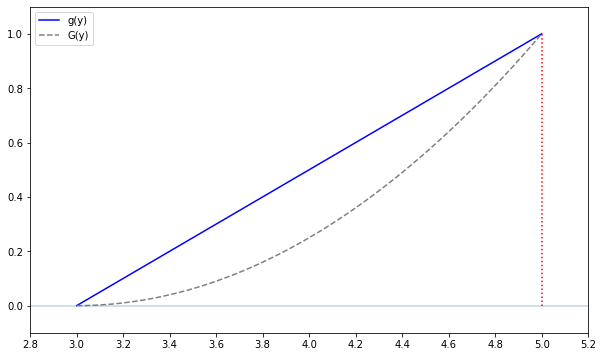

In [55]:
# 밀도함수와 분포함수 한번에 출력

ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 밀도함수
ax.plot(ys, [g(y) for y in ys], label = 'g(y)', color = 'blue')
# 분포함수
ax.plot(ys, [G(y) for y in ys], label = 'G(y)', ls = '--', color = 'gray')
ax.hlines(0, 2.8, 5.2, alpha = 0.3)
ax.vlines(ys.max(), 0, 1, linestyles = ':', color = 'red')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

- 연속형 확률변수의 지표
  - 기댓값
  - 분산

In [64]:
# 기댓값

def integrand(x):
    return x*f(x)

X1 = integrate.quad(integrand, -np.inf, np.inf)[0]
X1

0.667

In [60]:
# 확률변수 변환 후 기댓값
# X = 2X+3으로 변환시

def E(x, g=lambda x:x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [65]:
# 기댓값 출력
X2 = E(X, g = lambda x:2*x+3)
X2

4.333

In [67]:
# 기댓값의 선형성 성립
print('계산식:', X1 *2 +3)
print('함수 출력:', X2)

계산식: 4.333333333333333
함수 출력: 4.333333333333334


In [68]:
# 분산 
mean = E(X)
def integrand(x):
    return (x-mean)**2*f(x)
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [69]:
# 확률변수 변환 후 분산

def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(x, g)
    def integrand(x):
        return (g(x)-mean)**2*f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [70]:
V(X)

0.056

In [73]:
# 확률변수 변환 후 분산
V(X, lambda x : 2*x +3)

0.222

In [75]:
2**2*V(X)

0.222

### 4) 2차원 연속형 확률변수

- 결합확률밀도함수

## 2. 대표적인 연속형 확률분포
<img src = 'data/연속확률변수.png' STYLE='width 100px;'>

In [5]:
# 평균, 분산, 그래프 출력 함수

In [11]:
linestyles = ['-', '--', ':']

# 평균
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]
# 분산
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0] # 적분값과 추정 오차를 반환하는 함수(피적분함수, 적분 범위)

# 평균, 분산 반환
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'기댓값: {E(X):.3f}')
    print(f'분산: {V(X):.3f}')
    
# 그래프 반환
def plot_prob(X, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='blue')

    ax.legend()
    plt.show()

### 1) 정규분포

- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기

<img src = 'data/정규분포.png' STYLE='width 100px;'>

- 정규분포의 밀도 함수
<img src = 'data/정규분포2.jpg' STYLE='width 200px;'>

- 가장 대표적인 정규분포 => 표준정규분포(N(0, 1))

- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요

### 확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

-scipy함수
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


In [14]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

In [15]:
# N(2, 0.5^2) 을 따르는 확률변수 X 출력
mu = 2
sigma = 0.5
X = N(mu, sigma)
X

([-inf, inf], <function __main__.N.<locals>.f(x)>)

In [17]:
# 기댓값과 분산 출력
check_prob(X)

expected vaue 2.000
variance 0.250


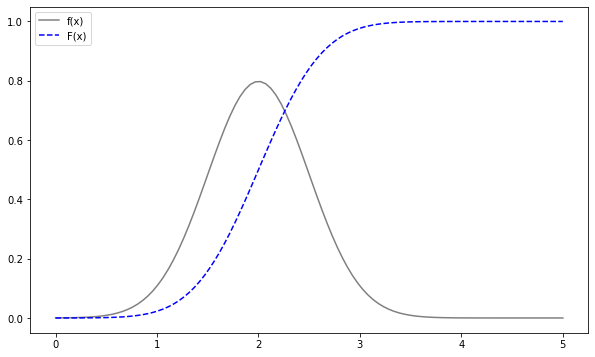

In [21]:
# 밀도함수와, 분포함수 출력
plot_prob(X, 0, 5)

In [24]:
# 정규분포의 객체생성 매서드
# scipy.stats.norm => 가우시안 정규분포 객체를 생성하는 매서드
# stats.norm(평균, 표준편차)
rv = stats.norm(2, 0.5)
rv

In [27]:
# 평균, 분산 출력
print(rv.mean())
print(rv.var())

2.0
0.25


In [28]:
# 밀도함수 pdf(x)=> x일때 확률
rv.pdf(2)

0.798

In [30]:
# 누적분포함수 cdf(x)=> x까지일때 면적
rv.cdf(0.7)

0.005

In [32]:
# isf : 생존함수의 역함수(inverse survival function), 상위 %
# 상위 30%의 x값을 구할 때
rv.isf(0.3)

2.262

In [33]:
# interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다. (n % 구간)
# 90% 구간일 때
rv.interval(0.9)

(1.178, 2.822)

In [34]:
# interval 구간을 isf 로 이용시
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

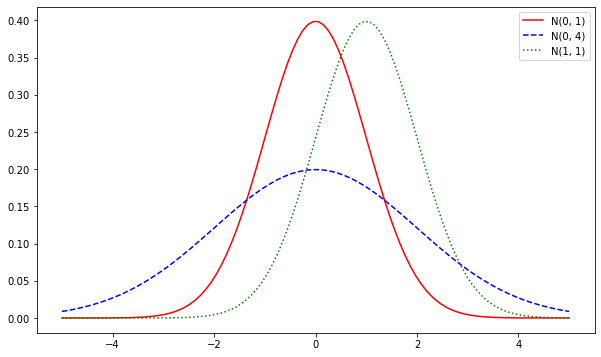

In [39]:
# 파라미터(평균과 분산)의 변화에 따라 정규분포 형태 변화 확인

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터(평균, 표준편차)
for param, ls, color in zip(params, linestyles, colors):
    mu, sigma = param
    # scipy.stats.norm => 가우시안 정규분포 객체를 생성하는 매서드
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color=color)
ax.legend()

plt.show()

- 평균이 커지면 그래프 모양 그대로 이동
- 분산이 커지면 분포가 넓어짐(그래프 완만해짐)

In [42]:
# 위를 더 간단하게
# N(0, 1)을 이루는 확률밀도함수에서 x = 0 일때의 y 값
stats.norm.pdf(loc=0, scale = 1, x=0)

0.399

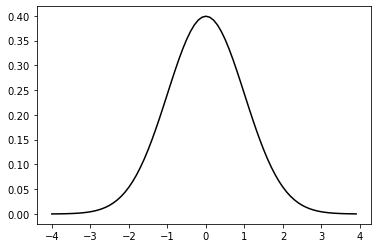

In [45]:
# -4~4 사이에 간격을 0.1
# loc=평균, scale=표준편차
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1), color = 'black')

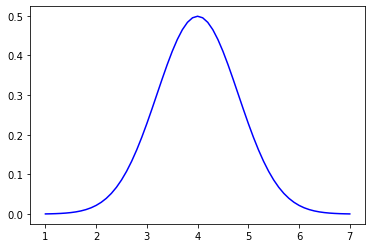

In [46]:
# x : 1~7.1, 평균 : 4, 표준편차 : 0.8
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='blue')

In [50]:
# 확률변수가 4일때 확률밀도
stats.norm.pdf(loc=4, scale = 0.8, x=4)
# 다른 방법
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=4)

0.499

In [51]:
# 누적분포함수
stats.norm.cdf(loc=4, scale=0.8, x=7) # x=7일때 y값이 거의 0으로 수렴하기때문에 누적값은 1에 가까움

1.000

- 과제0830_2
  - 상기누적분포함수를 그래프로 출력하세요.
  - 확률변수가 4일때, 누적분포값(확률)
  - 확률이 0.5일때 확률변수를 구하세요.

In [63]:
# 복습
# N(4, 0.8^2)을 따르는 확률밀도와 누적분포 그래프 그리기

# N(mu, sigma**2)을 따르는 확률변수 X 구하기
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        # 정규분포의 밀도함수 공식 대입
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

# 기댓값, 분산 출력
X = N(4, 0.8)
check_prob(X)

기댓값: 4.000
분산: 0.640


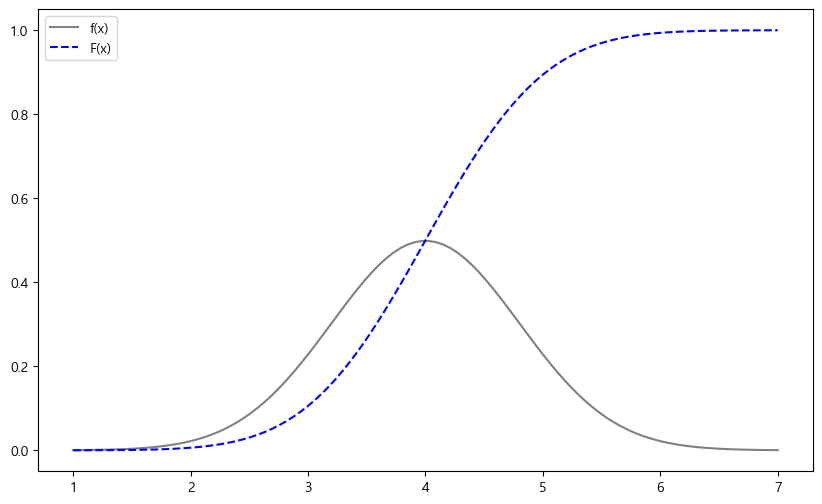

In [66]:
# 확률밀도함수와 누적분포함수 그래프 출력
plot_prob(X, 1, 7)

In [74]:
# 1. 확률변수가 4일때, 누적분포값(확률)
# 2. 확률이 0.5일때 확률변수를 구하세요.

# 1. 확률변수가 4일때, 누적분포값은 4일때까지의 면적
# 방법 1
print('====확률변수가 4일때, 누적분포값?====')
rv = stats.norm(4, 0.8)
print('누적분포값:', rv.cdf(4))
# 방법 2
rv2 = stats.norm.cdf(loc = 4, scale = 0.8, x = 4)
print('누적분포값:', rv2)

# 2. 확률이 0.5일때, 확률변수는?
# 생존함수의 역함수 이용 (isf) => 확률이 0.5라는건 밑에 면적을 1로 두고 0.5 이기 때문에 상위 50%의 x를 구하는것과 같음
print('\n', '====확률이 0.5 일때, 확률변수의값?====')
print('확률변수:', rv.isf(0.5))

====확률변수가 4일때, 누적분포값?====
누적분포값: 0.5
누적분포값: 0.5

 ====확률이 0.5 일때, 확률변수의값?====
확률변수: 4.0


Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

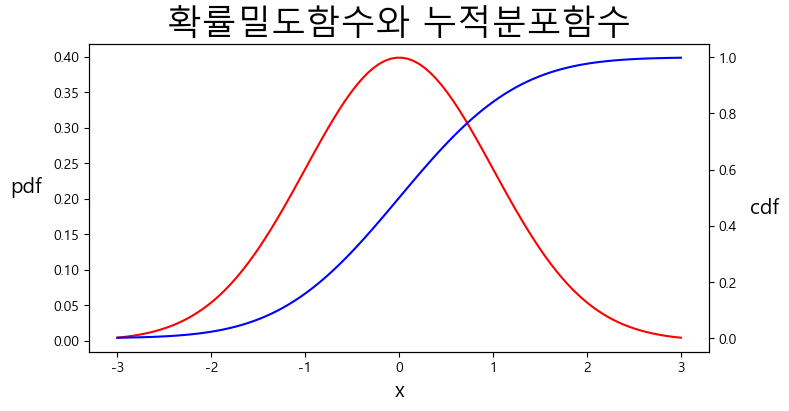

In [52]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
# N(0, 1**2)을 따르는 확률변수
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)

In [53]:
rv.cdf(0)

0.500

In [54]:
rv.cdf(1)

0.841

In [55]:
# ppf : 누적분포함수의 역함수, 누적분포가 0.5인 x 값
rv.ppf(0.5)

0.000

In [56]:
# rv.ppf(0.95)
rv.ppf(0.95)

1.645

In [57]:
# 0~1까지 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.341

In [58]:
# (-2< x <2)확률을 구하기
rv.cdf(2) - rv.cdf(-2)

0.954

- 과제 0830_3
  - 상위 5% 확률의 확률변수 구하기
  - 하위 5% 확률의 확률변수 구하기

In [77]:
# N(0, 1)
rv = stats.norm(0, 1)
# 상위 5% 확률변수 구하기 (이때, 누적확률 = 0.95)
# isf 사용
print('상위 5%확률의 확률변수:', round(rv.isf(0.05), 2))
# 하위 5% 확률변수 구하기 (이때, 누적확률 = 0.05)
# ppf 사용
print('하위 5%확률의 확률변수:', round(rv.ppf(0.05), 2))

상위 5%확률의 확률변수: 1.64
하위 5%확률의 확률변수: -1.64


- 과제 0830_4
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오

In [103]:
# 그래프 반환 함수
def plot_prob2(loc, scale, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    # N(loc, scale을 따르는 확률변수)
    rv = stats.norm(loc, scale)
    # x구간
    xx = np.linspace(x_min, x_max, 100)
    y1 = rv.pdf(xx)
    y2 = rv.cdf(xx)
    
    # 플롯 사이즈 지정
    ax1.plot(xx, y1, color="red") 
    ax2.plot(xx, y2, color='blue')
    ax1.set_xlabel('x', fontsize = 15)                          # x축 레이블 지정
    ax1.set_ylabel('pdf', rotation = 0, fontsize = 15, labelpad = 20)
    ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
    plt.title('확률밀도함수와 누적분포함수',fontsize=20)

    plt.show()

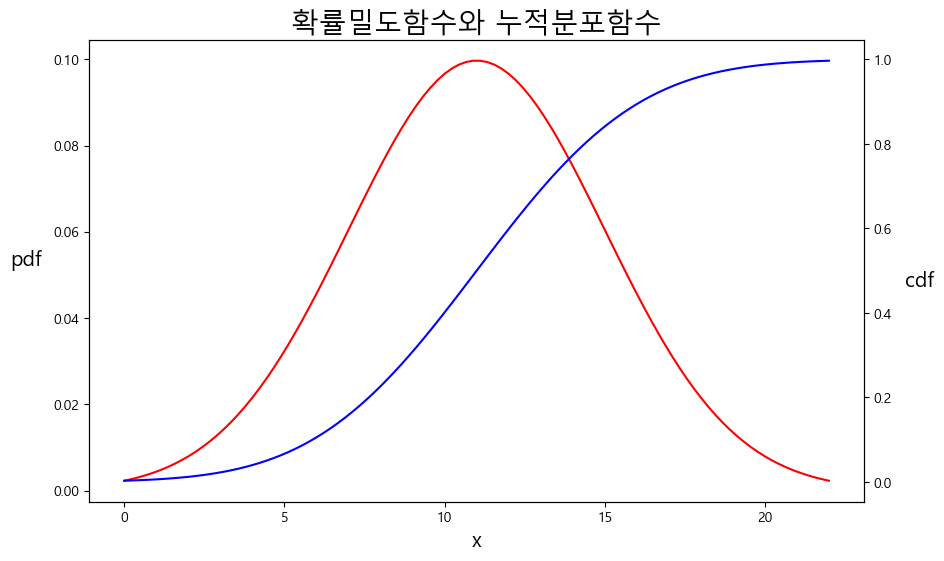

In [104]:
# 문제 1번.
# N(11, 4**2)
# 그래프 출력
plot_prob2(11, 4, 0, 22)

In [4]:
# 14년이상 근무한 종업원의 비율 => x=14 일때의 왼쪽면적(비율%)
# cdf로 x=14 일때 면적을 구한 후 1 - 면적
p = stats.norm.cdf(loc = 11, scale = 4, x = 14)
print(f'14년 미만인 비율 = {round(p, 2)*100}%, 14년 이상인 비율 {round((1-p), 2)*100}%')

14년 미만인 비율 = 77.0%, 14년 이상인 비율 23.0%


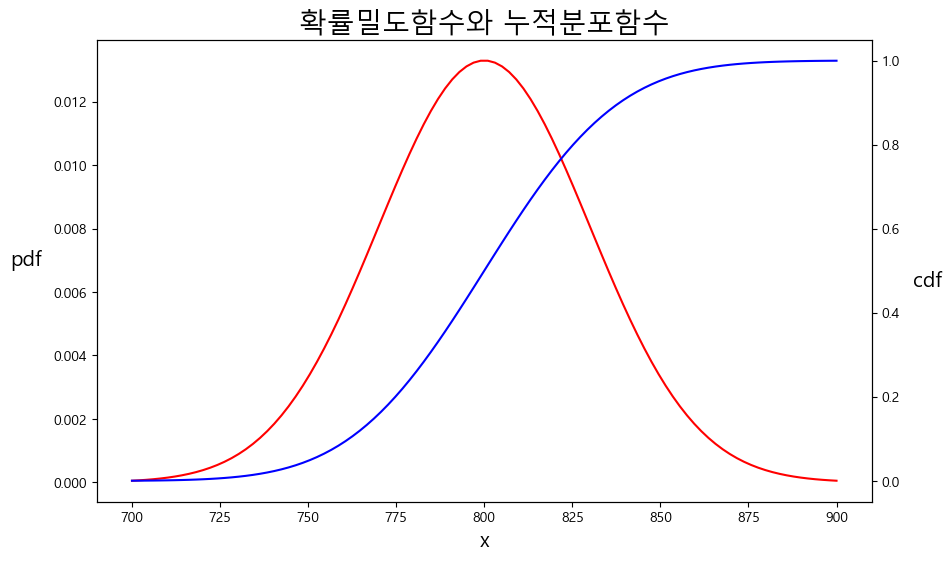

In [88]:
# 문제 2번.
# N(800, 30**2), P(x<=760) 확률

# 그래프 출력
plot_prob2(800, 30, 700, 900)

In [89]:
# x<=760의 확률 => x일때 누적값(면적)
stats.norm.cdf(loc = 800, scale = 30, x = 760)

0.091

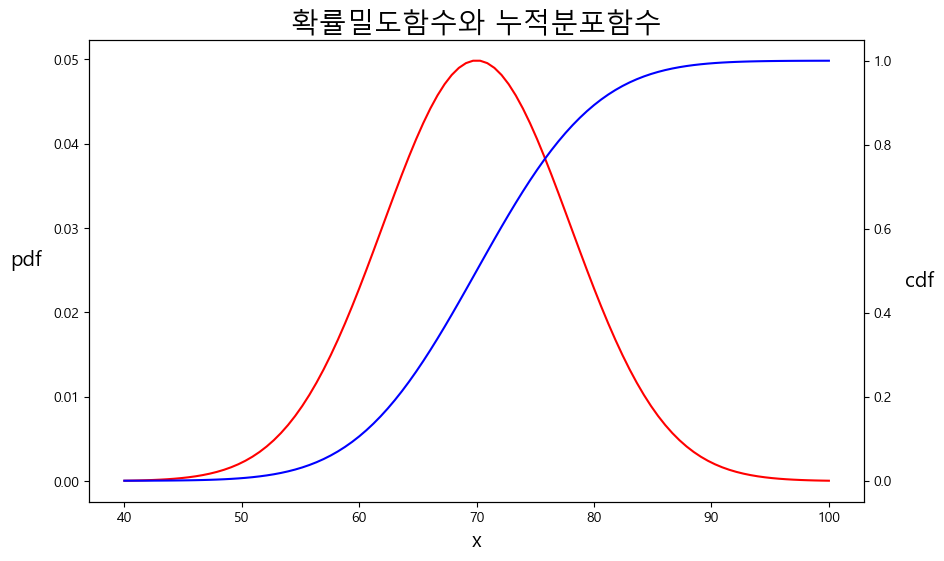

In [105]:
# 3번. 
# N(70, 64) => P(80<= x <= 90)

# 그래프 출력
plot_prob2(70, np.sqrt(64), 40, 100)

In [6]:
# P(80<= x <= 90) => x=90 일 때 누적확률 - x=80일 때 누적확률
rv = stats.norm(70, np.sqrt(64))
x_90 = rv.cdf(90)
x_80 = rv.cdf(80)
print('80점 이상이고 90점 이하일 확률:', round((x_90-x_80), 3))

80점 이상이고 90점 이하일 확률: 0.099


### 2) 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 지수분포를 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포이다.
- 지수분포의 밀도함수 :

$f(x) = {\lambda}e^{{-\lambda}x} (x \ge 0)$

                                                           0        (otherwise)
                                                           
- 특징:
  - 기댓값: 1/ $\lambda$
  - 분산: 1/$\lambda$**2

In [8]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x>=0:
            return lam*np.exp(-lam*x)
        else:
            return 0
    return x_range, f

In [14]:
# lam => 평균 발생 횟수(확률)
lam =2
X = Ex(lam)
check_prob(X)

기댓값: 0.500
분산: 0.250


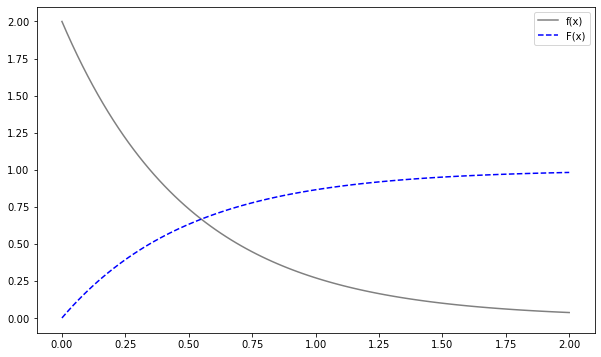

In [15]:
# 그래프 출력
plot_prob(X, 0, 2)

- 과제 0831_1
  - 파라미터가 1, 2, 3으로 변환시 바뀌는 그래프 출력

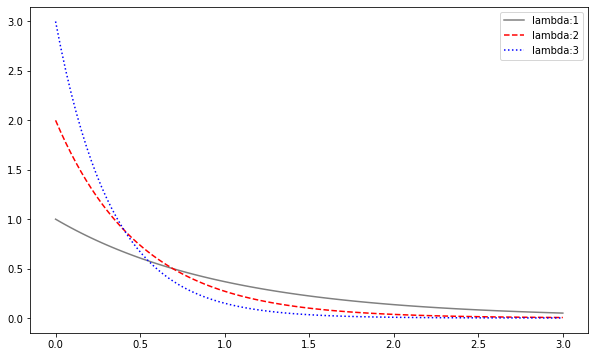

In [17]:
# 𝜆 변경시 그래프 변화 보기

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
colors = ['gray', 'red', 'blue']
lams = [1, 2, 3]
for lam, ls, color in zip(lams, linestyles, colors):
    rv = stats.expon(scale = 1/lam) # expon => 지수분포를 따르는 확률변수
    ax.plot(xs, rv.pdf(xs),
            label = f'lambda:{lam}', ls=ls, color = color)
ax.legend()
plt.show()    

- 𝜆가 커질 수록 그래프가 가파라짐
- 𝜆가 커질 수록 확률분포가 점점 감소

F(t) => 1-  $e^{{-\lambda}t} (t \ge 0)$ => t시간 이내로 발생할 확률

In [21]:
# 2일 이내에 사건이 발생할 확률
def F(lam, x):
    def f(x):
        if x>=0:
            return lam*np.exp(-lam*x)
    return 1 - f(x)/lam
lam = 1/2 # 하루 평균 2번 발생
F(lam, 2)

0.632

In [23]:
lam1 = 1
F(lam1, 2)

0.865

### 3) 카이제곱분포
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.

- 서로 독립인 복수의 표준정규분포에 의해 정의 (Z1, Z2, Z3 ... Zn 은 서로 독립)

 $Y = sum ({(Zi)^2} (1<=i<=n))$
 
 카이제곱 분포 = ${X^2}(n)$ (n = 자유도)

- 과제 0831_2
  - p129~223 예제 코드로 작성하세요.

In [27]:
# 표준정규분포에서 자유도(표본크기) n으로 무작위추출을 하여 제곱합을 취하는 작업 (100만번 수행 1e6) 
# 자유도가 n인 카이제곱분포 함수
def chi2_sample(n):
    # 표준정규분포
    rv = stats.norm()
    sample_size = int(1e6)
    #표준정규분포에서 표본크기 100만으로 무작위추출
    Zs_sample = rv.rvs((n, sample_size)) # rvs => n 행과 sample_size 열 모양으로 무작위 뽑음
    # axis = 0 방향으로 총합을 구한 후, 표준정규분포의 제곱합으로 표본 데이터 생성
    return np.sum(Zs_sample**2, axis=0)
chi2_sample(10)

array([ 8.304,  3.683,  7.476, ...,  9.814,  6.477, 14.618])

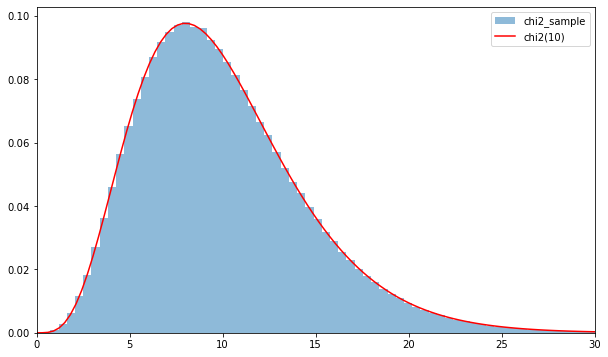

In [28]:
# 카이제곱 분포에서 무작우로 추출한 표본 데이터의 히스토그램과 카이제곱분포의 밀도함수 그래프 출력
def chi2_plot(n):
    fig = plt.figure(figsize =(10, 6))
    ax = fig.add_subplot(111)
    
    rv_true = stats.chi2(n) # chi2=> 카이제곱분포를 따르는 확률변수
    xs = np.linspace(0, 30, 100)
    # 히스토그램
    ax.hist(chi2_sample(n), bins=100, density=True, alpha=0.5, label = f'chi2_sample')
    ax.plot(xs, rv_true.pdf(xs), label = f'chi2({n})', color = 'red')
    ax.legend()
    ax.set_xlim(0, 30)
    return plt.show()
chi2_plot(10)

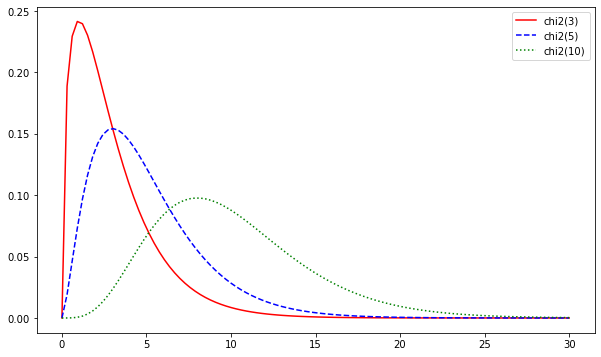

In [29]:
# 자유도 변경시 확률밀도 함수 그래프 변화 (3, 5, 10)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
xs = np.linspace(0, 30, 100)

for n, ls, color in zip([3, 5, 10], linestyles, colors):
    rv_true = stats.chi2(n)
    ax.plot(xs, rv_true.pdf(xs), label = f'chi2({n})', color=color, ls = ls)
ax.legend()
plt.show()

- 자유도가 커질 수록, 그래프가 정규분포에 가까워짐(좌우대칭)
- 자유도의 값 가까이에 분포의 정점에 위치

- 자유도 n인 카이제곱분포의 상위 100a%점 = ${X^2}a(n)$ 

In [30]:
n = 5
a = 0.05
rv = stats.chi2(n)
rv.isf(a)

11.070

### 3) t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
<img src = 'data/t분포.png' STYLE='width 100px;'>
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 따를 때 t = ${Z} \over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 애기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용 (절대적인 기준X)


- 과제 0831_3
  - p224~228 예제 코드 풀기

In [31]:
# t분포 함수 생성 표준정규분포, 카이제곱분포에서 각각 100만번 무작위 추출
def T(n):
    Y = stats.chi2(n)
    # 표준정규분포
    Z = stats.norm()
    sample_size = int(1e6)
    Z_sample = Z.rvs(sample_size)
    Y_sample = Y.rvs(sample_size)
    return Z_sample/np.sqrt(Y_sample/n)
T(10)

array([ 0.045, -0.98 ,  0.913, ..., -1.139,  0.447,  0.571])

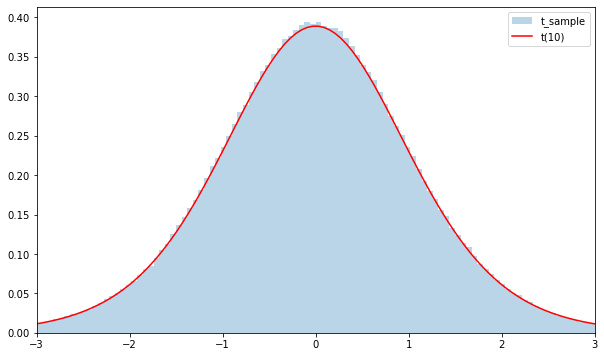

In [34]:
# T(n)에서 추출한 표본 데이터의 히스토그램과 밀도함수 출력

def T_plot(n):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    
    rv = stats.t(n) #t함수=>t분포를 따르는 확률변수
    xs = np.linspace(-3, 3, 100)
    
    # 히스토그램
    ax.hist(T(n), bins = 100, range = (-3, 3), density = True, alpha = 0.3, label ='t_sample')
    ax.plot(xs, rv.pdf(xs), label = f't({n})', color='red')
    ax.legend()
    ax.set_xlim(-3, 3)
    return plt.show()

T_plot(10)

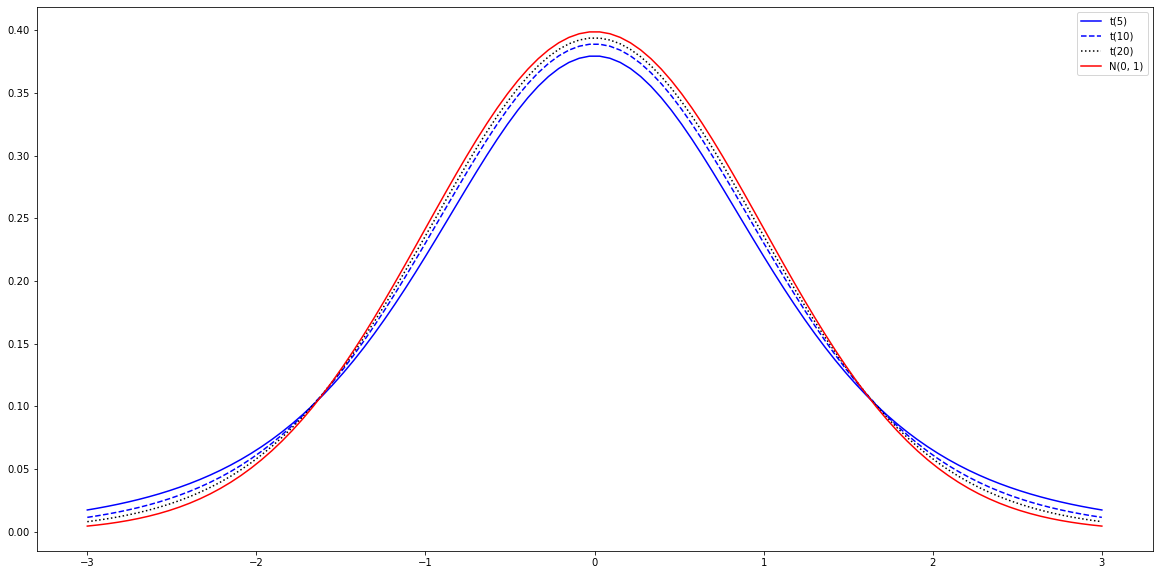

In [41]:
# 자유도 변경시 그래프 변화 (5, 10, 20)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
colors = ['blue', 'blue', 'black']
xs = np.linspace(-3, 3, 100)

for n, ls, color in zip([5, 10, 20], linestyles, colors):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label = f't({n})', color = color, ls = ls)
    
# 표준정규분포 그리기
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label = 'N(0, 1)', color = 'red', ls = '-')
ax.legend()
plt.show()

- 좌우대칭 분포
- 자유도가 커질수록 표준정규분포의 형태과 비슷해짐
- 표준정규분포보다 꼬리의 두께가 두껍다

- 자유도가 n, t 분포의 상위 100a% 점 = ${ta(n)}$ (isf 매서드 사용)

In [44]:
# 상위 5 % 의 점수 (n = 5)
a = 0.05
n = 5
rv = stats.t(n)
rv.isf(0.05)

2.015

### 4) F분포
- 확률변수 $Y_1, Y_2$는 서로 독립이고 각각 $Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때,
F = ${Y_1/n_1}\over{Y_2/n_2} $의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

- 과제 0831_4
  - p229~232 예제 코드 작성하기

In [47]:
def F_(n1, n2):
    return (stats.chi2(n1)/n1)/(stats.chi2(n2)/n2)

In [49]:
# 무작위추출 100만번 
def F(n1, n2):
    rv1 = stats.chi2(n1)
    rv2 = stats.chi2(n2)
    
    sample_size = int(1e6)
    # n1 에서 무작위추출
    Y1 = rv1.rvs(sample_size)
    Y2 = rv2.rvs(sample_size)
    
    return (Y1/n1)/(Y2/n2)
F(5, 10)

array([4.558, 1.346, 1.218, ..., 1.112, 0.585, 2.122])

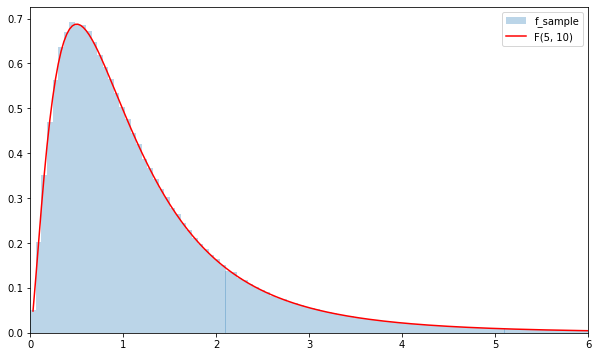

In [53]:
# 위에서 뽑은 F분포를 따르는 확률변수로 이뤄진 히스토그램, 확률밀도함수그래프 출력

def F_plot(n1, n2):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    
    rv = stats.f(n1, n2) #f함수 => F분포를 따르는 확률변수
    xs = np.linspace(0, 6, 200)[1:]
    #히스토그램
    ax.hist(F(n1, n2), bins = 100, range=(0, 6), density = True, alpha = 0.3, label = 'f_sample')
    #밀도함수
    ax.plot(xs, rv.pdf(xs), label = f'F({n1}, {n2})', color='red')
    ax.legend()
    ax.set_xlim(0,6)
    return plt.show()
F_plot(5, 10)

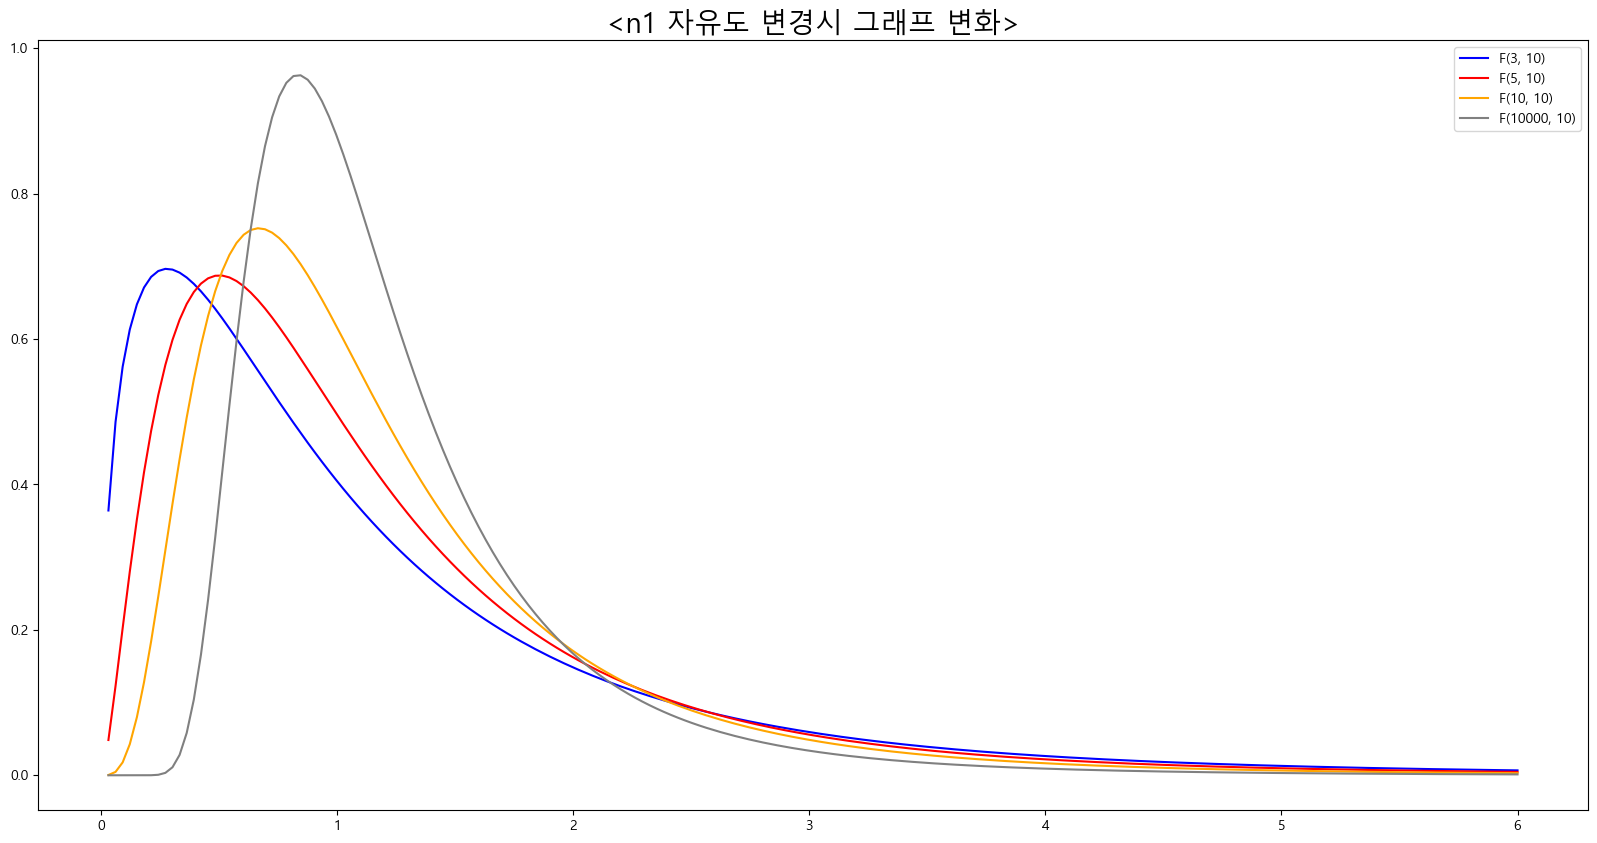

In [67]:
# n1의 자유도 변경시 그래프 변화 보기 (n1 => 3, 5, 10, 20, n2 = 10)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
xs = np.linspace(0, 6, 200)[1:]
colors = ['blue', 'red', 'orange', 'gray']
n1_li = [3, 5, 10, 10000]
n2 = 10
for n1, ls, color in zip(n1_li, linestyles, colors):
    rv = stats.f(n1, n2)
    ax.plot(xs, rv.pdf(xs), label = f'F({n1}, {n2})', ls = '-', color= color)
plt.title('<n1 자유도 변경시 그래프 변화>', fontsize = 20)
ax.legend()
plt.show()    

- 좌우비대칭(왼쪽으로 치우치고 오른쪽으로 넓어지는 분포)
- n1의 자유도가 커질 수록 그래프가 오른쪽으로 치우침, 분포의 정점이 1에 가까워짐

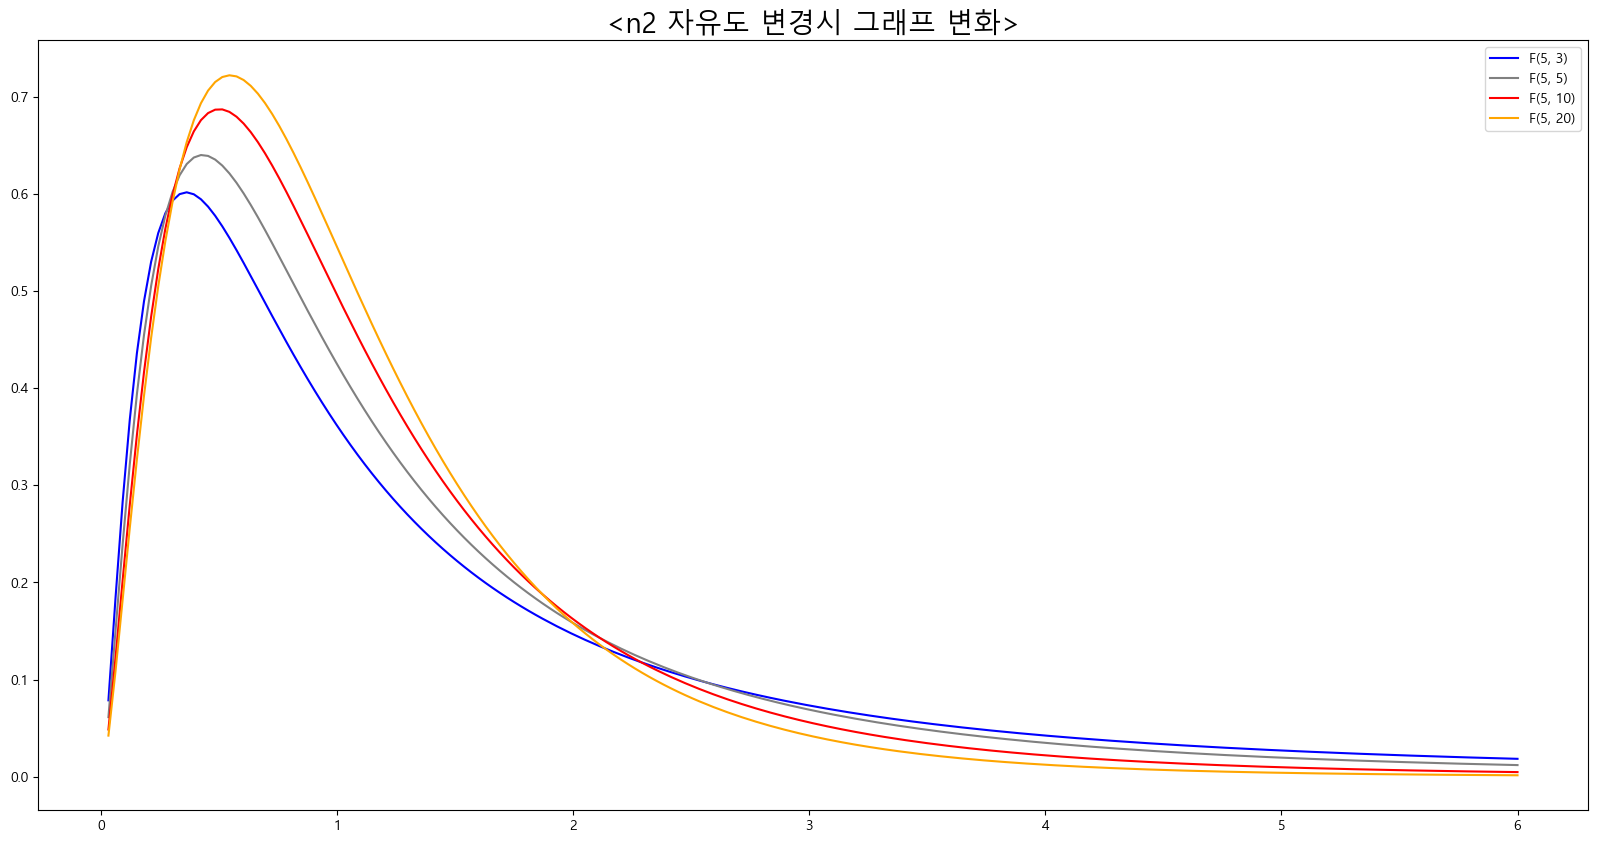

In [64]:
# n2의 자유도 변경시 그래프 변화 보기 (n2 => 3, 5, 10, 20, n1 = 5)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
xs = np.linspace(0, 6, 200)[1:]
colors = ['blue', 'gray', 'red', 'orange']
n2_li = [3, 5, 10, 20]
n1 = 5
for n2, ls, color in zip(n2_li, linestyles, colors):
    rv = stats.f(n1, n2)
    ax.plot(xs, rv.pdf(xs), label = f'F({n1}, {n2})', ls = '-', color= color)
plt.title('<n2 자유도 변경시 그래프 변화>', fontsize = 20)
ax.legend()
plt.show()    

- n2의 값이 커질 수록 분포의 정점이 1에 가까워짐

# 독립동일분포

In [40]:
# 이산형 확률변수 다루는 함수
linestyles = ['-', '--', ':', '-.']

# 기댓값
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

# 각각의 확률변수를 이루는 확률함수
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 1. 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.

### 1) 독립성

#### 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님

In [12]:
# 증명(1. 무상관성 != 독립, 2. 독립==무상관)

# 불공정한 주사위의 예
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x*y/441 # 불공정한 주사위 21 *21
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [13]:
#  2차원 확률변수 X와 Y는 독립
Cov(XY)# 공분산이 0으로 무상관
# => x, y가 독립성이면 무상관 2번 증명

-0.000

In [14]:
# 무상관인 2개의 확률변수 고려
# 각각 확률이 동일한(1/3)인 2차원 확률변수

x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1/3
    else:
        return 0
XY = [x_set, y_set, f_XY]

#공분산 출력 
Cov(XY) # 0이므로 x, y는 무상관

0.000

In [20]:
# 독립성인지 확인
f_X(0)*f_Y(0), f_XY(0, 0) # 두값이 달라서 독립적이지 않음 => 1번증명

(0.111, 0.333)

In [21]:
# 다른값 대입
f_X(1)*f_Y(1), f_XY(1, 1) # 두값이 달라서 독립적이지 않음

(0.222, 0.333)

### 2) 합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.


#### 2-1) 정규분포 합의 분포

In [47]:
# 서로 독립인 X~N(1, 2), Y~N(2, 3)이 있을 때, 확률변수 X + Y의 분포는 N(3, 5)를 따름
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

# 각 rv1, rv2에서 100만번 추출
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

# 평균, 분산 출력
print(f'X_sample의 N({np.mean(X_sample), np.var(X_sample)}')
print(f'Y_sample의 N({np.mean(Y_sample), np.var(Y_sample)}')
# 계산했을 때
print(f'계산 시 N({np.mean(X_sample)+np.mean(Y_sample)}, {np.var(X_sample)+np.var(Y_sample)})')
# 합의 분포의 평균과 분산 출력
np.mean(sum_sample), np.var(sum_sample)

X_sample의 N((1.000473586272459, 1.9984500914774526)
Y_sample의 N((1.998047169027909, 2.9956949902124395)
계산 시 N(2.998520755300368, 4.994145081689892)


(2.999, 4.989)

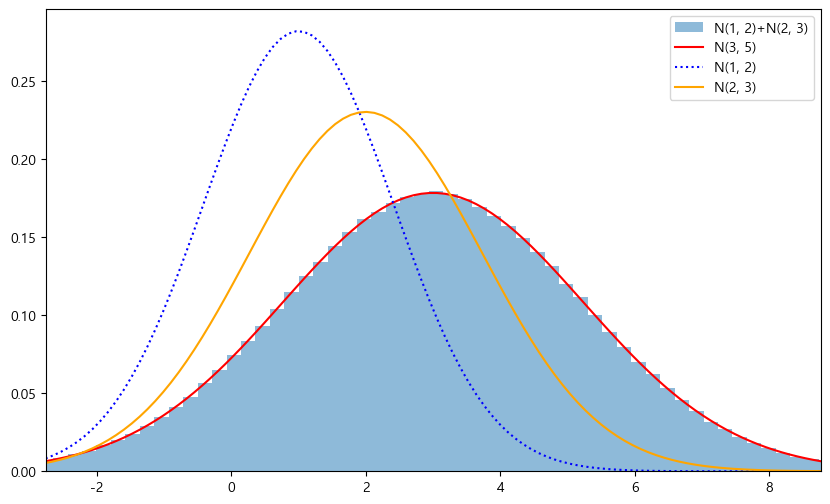

In [49]:
# 그래프 출력 (X, Y, X+Y, 식대입X+Y-sum_sample)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 1. X+Y(위에서 구한 sum_sample)의 히스토그램 출력
ax.hist(sum_sample, bins = 100, density=True, alpha = 0.5, label = 'N(1, 2)+N(2, 3)')

# X, Y의 기댓값과 분산
mus = [1, 2]
sigmas = [2, 3]
colors = ['blue', 'orange']
linestyles = [':', '-']

# X+Y의 최소 최대를 x축의 범위로 주기
rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

# 2. N(3, 5)_X+Y 밀도함수 출력 (1과 같은지 확인)
ax.plot(xs, rv.pdf(xs), label = 'N(3, 5)', color = 'red', ls = '-')

for mu, sigma, ls, color in zip(mus, sigmas, linestyles, colors):
    
    rv1 = stats.norm(mu, np.sqrt(sigma))
    ax.plot(xs, rv1.pdf(xs), label = f'N({mu}, {sigma})', color=color, ls=ls)
ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

- 정규분포 모양을 가진 서로 독립인 확률변수는 그 합도 정규분포가 됨
   - => 동일한 분포를 따르고 서로 독립인 확률변수는 그 합도 동일한 확률분포가 되는 성질 ("재생성")

- 과제0901_1
  - p243~250 예제 풀기

#### 2-2) 포아송분포의 합의분포
- 포아송분포의 성질 : 기댓값 == 분산 (Poi(x)의 기댓값, 분산 == x)

In [54]:
# 포아송분포를 따르는 서로 독립인 두 확률변수의 분포 확인

# 두 사건의 포아성확률변수 (x = 3번, y = 4번)
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

# 100만번 추출
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

# 두 확률분포 더하기
sum_sample = X_sample + Y_sample
# 합의 분포의 평균과 분산 추출
print('평균:', round(np.mean(sum_sample), 1), '분산:', round(np.var(sum_sample), 1))  # 두 합의 분포의 평균 == 분산 (포아송분포의 성질)

평균: 7.0 분산: 7.0


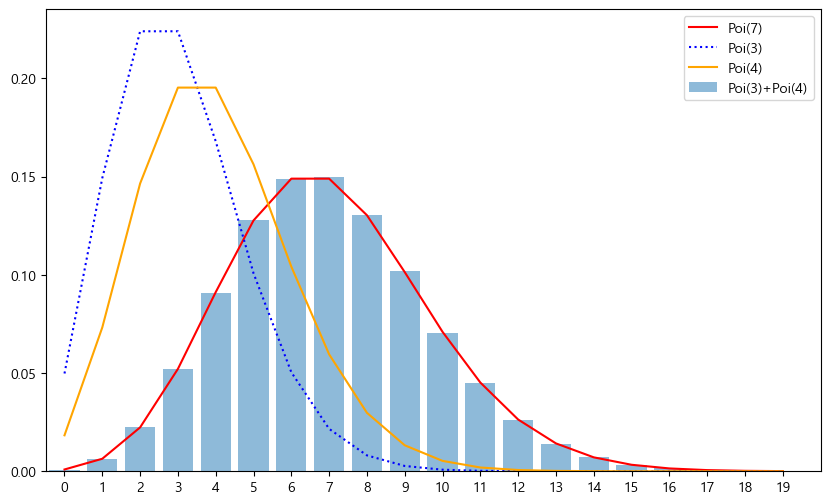

In [60]:
# 포아송분포를 가진 각각의 분포 모양 확인 (확률밀도그래프)
# 그래프 출력 (X, Y, X+Y, 식대입X+Y-sum_sample)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# X, Y의 포아송 확률함수변수
lams = [3, 4]
colors = ['blue', 'orange']
linestyles = [':', '-']

# x+y = 7의 포아송
rv = stats.poisson(7)
xs = np.arange(20)

# 1. X+Y(위에서 구한 sum_sample)의 히스토그램 출력
hist, _ = np.histogram(sum_sample, bins = 20, range = (0, 20), normed = True)
ax.bar(xs, hist, alpha = 0.5, label = 'Poi(3)+Poi(4)')
# ax.hist(sum_sample, bins = 20, range=(0, 20), density=True, alpha = 0.5, label = 'Poi(3)+Poi(4)')

# # 2. Poi(7)_X+Y 밀도함수 출력 (1. 과 같은지 확인)
ax.plot(xs, rv.pmf(xs), label = 'Poi(7)', color = 'red', ls = '-')

for lam, ls, color in zip(lams, linestyles, colors):
    
    rv1 = stats.poisson(lam)
    ax.plot(xs, rv1.pmf(xs), label = f'Poi({lam})', color=color, ls=ls)
    
ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

- 포아송분포 모양을 가진 서로 독립인 확률변수는 그 합도 포아송분포가 됨 (변수가 커질 수록 정규분포 형태와 가까워짐)
   - => 동일한 분포를 따르고 서로 독립인 확률변수는 그 합도 동일한 확률분포가 되는 성질 ("재생성")

#### 2-3) 베르누이 분포의 합의분포
- 베르누이 분포의 특성 : Bern(p)의 기댓값 = p, 분산 = p(1-p)
- $ X_1, X_2, ···, X_n ~Bern(p)를 따를 때,  \sum_{i=1}^n X_i$ 의 기댓값 = n*p, 분산 = n*p*(1-p)

In [68]:
# p = 0.3인 베르누이 분포를 따르는 독립 사건 10개에서 무작위 추출한 표본 데이터의 평균과 분산 확인
p = 0.3
n = 10
rv = stats.bernoulli(p) # bernoulli 함수

sample_size = int(1e6)
# 10번의 무작위추출 실행
Xs_sample = rv.rvs((10, sample_size))
# 각 행 별로 더해줌
sum_sample = np.sum(Xs_sample, axis = 0)

# 평균과, 분산 추출
print('합의 분포의 기댓값과 분산')
print('기댓값', np.mean(sum_sample),'분산', np.var(sum_sample))

# Bern(p)의 평균과 분산
print('\n','원래 Bern(p)의 기댓값과 분산')
print('기댓값', 0.3, '분산', 0.3*0.7)

합의 분포의 기댓값과 분산
기댓값 3.000136 분산 2.094955981503999

 원래 Bern(p)의 기댓값과 분산
기댓값 0.3 분산 0.21


- n 이 10이므로 합의 분포의 기댓값 분산은 Bern(0.3)의 기댓값과 분산에 각각 10을 곱한 수와 같음

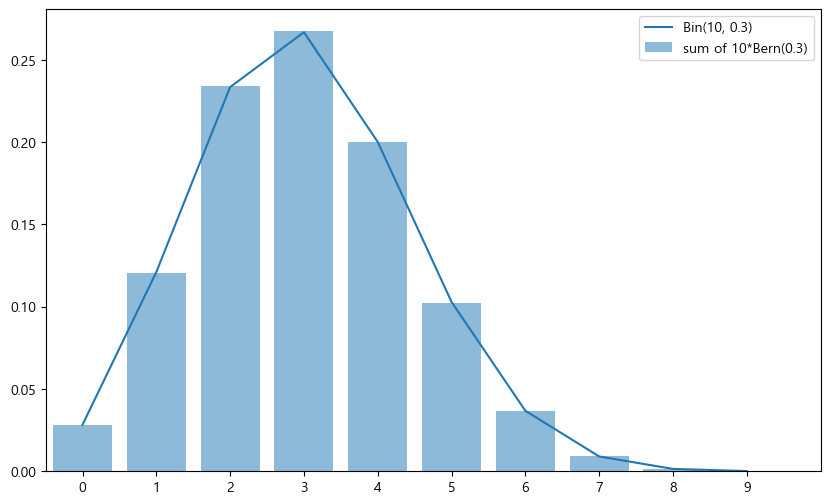

In [70]:
# 그래프 확인
# 베르누이 분포의 합의 분포는 이항분포를 이룸 Bin(n, p)
# Bin(10, 0.3) 과 위에서 무작위 추출한 포본 데이터의 히스토그램 출력

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins = 10, range = (0, 10), normed = True)
ax.bar(xs, hist, alpha = 0.5, label = 'sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label = 'Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

- 두 분포가 일치하지 않음 (베르누이 분포를 따르는 변수의 합의 분포가 베르누이 분포를 따르지 않음 => 재생성이 없다)

### 3) 표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산 (기댓값의 선형성)

$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$

#### 중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

#### 대수의 법칙
확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.


- 과제 0901_2
  - p251~260 예제 풀어보기

#### 3-1) 정규분포의 표본평균 분포

In [72]:
# 정규분포의 표본평균 분포확인 (동일한 정규분포를 따르는 표본집단의 평균과 분산)
# N(1, 2)를 따르는 곳에서 10개의 확률변수 추출 (n=10) => 표본평균
# 표본평균의 평균 = 1, 분산 = 2/10 (1번)

# 표본평균으로부터 무작위추출하여 표본 데이터의 평균과 분산으로 확인

mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)
np.mean(sample_mean), np.var(sample_mean) # 1번과 동일

(1.001, 0.200)

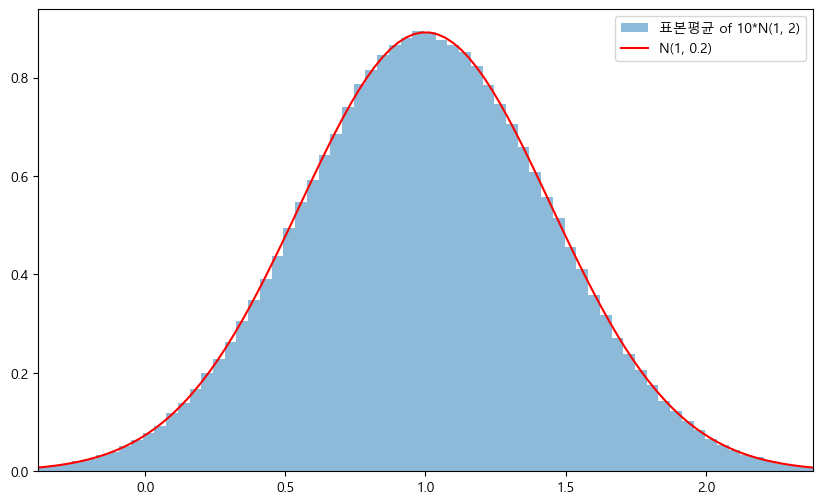

In [73]:
# 그래프 출력 (정규분포의 표본평균도 정규분포를 이루는지 확인)
# N(1, 0.2)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n)) 
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
#표본평균의 히스토그램 출력
ax.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = '표본평균 of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label = 'N(1, 0.2)', color = 'red')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

- 표본평균의 식과 동일

- 정규분포를 이루는 표본평균도 정규분포를 따름

#### 3-2) 포아송분포의 표본평균의 분포
- 포아송분포의 특징 : 기댓값 == 분산

In [77]:
# 포아송분포의 표본평균 => 기댓값과 분산 추출
lam = 3
rv = stats.poisson(lam)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

print('표본평균의 기댓값과 분산')
np.mean(sample_mean), np.var(sample_mean) # 포아송분포의 특징을 따르지 않음 (기댓값 != 분산)

표본평균의 기댓값과 분산


(2.999, 0.300)

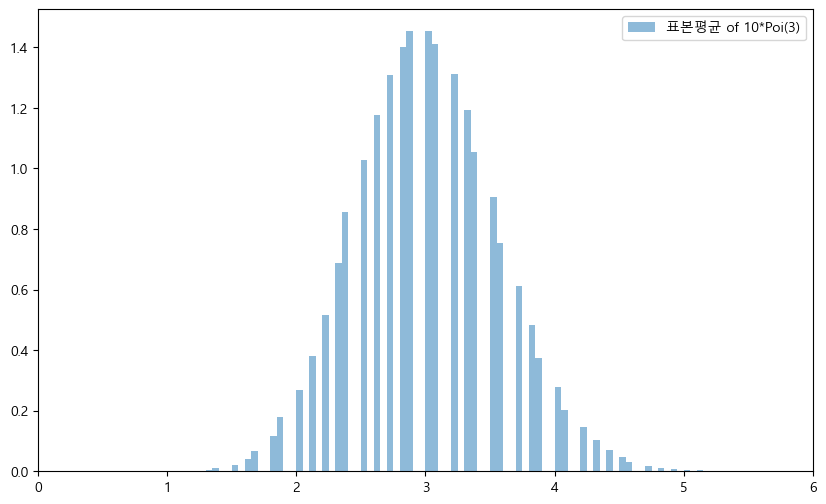

In [82]:
# 포아송분포의 표본평균 분포 확인
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins = 100,density = True, alpha = 0.5, label = '표본평균 of 10*Poi(3)')
ax.legend()
ax.set_xlim(0, 6)
plt.show()

- 포아송 분포의 표본평균은 포아송 분포를 따르지 않고, 오히려 정규분포의 모양과 가까움 => 중심극한정리와 연관

### 중심극한정리 증명
- 기댓값이 mu 이고, 분산이 sigma인 확률분포를 따르는 n개의 독립적인 확률변수의 표본평균 X의 분포는 n이 커짐에 따라 정규분포 N(mu, sigma/n)에 가까워짐 (모분산의 분포가 어떤 종류였던지간에 상관없음)

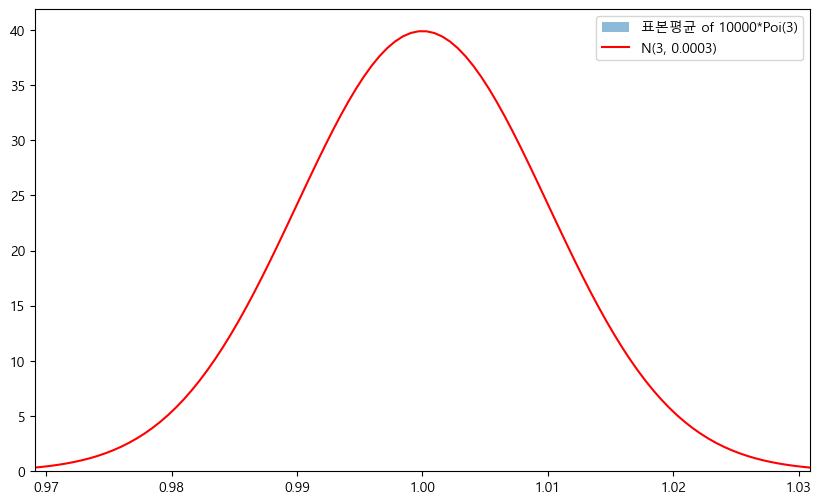

In [83]:
# 포아송 분포를 따르는 표본평균으로 증명하기

n = 10000 # 표본평균의 계산을 n번, 무작위추출 sample_size번 수행
lam = 3
sample_size = 10000
rv = stats.poisson(lam)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

rv_true = stats.norm(1, np.sqrt(1/n)) 
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100) 

# 표본데이터의 히스토그램과 중심극한정리에 정의된 N(mu, sigma/n) 의 밀도함수 출력
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = f'표본평균 of 10000*Poi({lam})')
ax.plot(xs, rv_true.pdf(xs), label = f'N({lam}, {lam/n})', color = 'red')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙
- 표본 크기를 키우면 표본평균은 모평균에 수렴

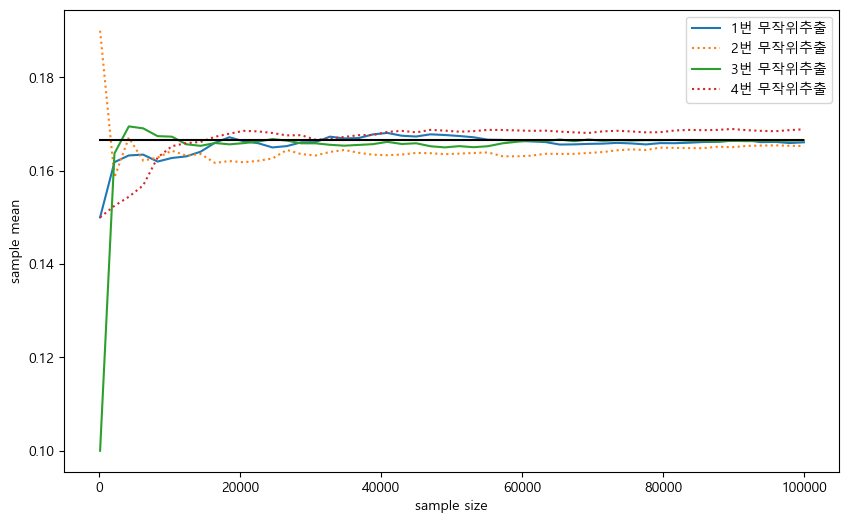

In [89]:
# 베르누이분포를 예시로 들어 증명
# 6이 나올 확률이 1/6인 주사위 (모평균)
p = 1/6
rv = stats.bernoulli(p)

# 표본크기가 10만인 무작위추출 4번 실행
n = int(1e5) 
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis = 0) for sp in space]).T # 무작위추출 1번, 2번, 3번, 4번(점점 늘려감)

# 그래프 변화 보기(추출 횟수가 늘어남에 따라)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
linestyles = ['-', ':', '-', ':']
colors = ['blue', 'red', 'greed', 'orange']

for pl, ls, color, i in zip(plot_list, linestyles, colors, [1,2,3,4]):
    ax.plot(space, pl, ls=ls, label = f'{i}번 무작위추출')
# 모집단의 평균 (1/6)
ax.hlines(p, -1, n , 'k')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

- 무작위추출을 여러번 할 수록 (표본 크기가 커질 수록) 모평균인 1/6과 비슷해짐

- 표본평균의 식과 동일

- 과제 0901_3
  - 중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.

In [16]:
# 예시_ 1등이 나올 확률이 0.1인 제비뽑기를 10000번 시행한 성공확률이 따르는 집단에서 무작위로 50개, 100개, 500개, 800개를 뽑음
# 이항분포 성질 (평균 = n*p, 분산 = n*p(1-p)) => N(n*p, p(1-p))의 정규분포와 가까워지는지 확인

# 1. 중심극한정리 (이항분포, 베르누이분포 예시)
# 이항분포 Bin(10000, 0.1)

In [17]:
# 모집단
stats.binom(10000, 0.1).mean(), stats.binom(10000, 0.1).var()

(1000.000, 900.000)

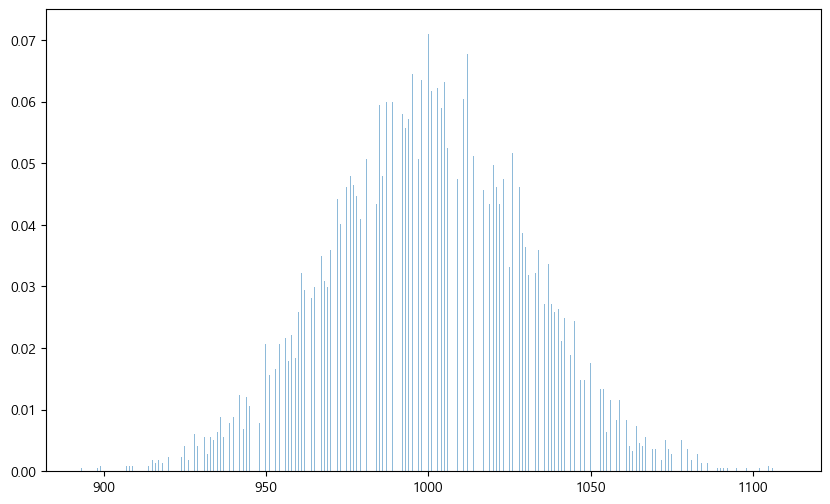

In [19]:
# Bin(10000, 0.1)
rv = stats.binom(10000, 0.1)
mo = rv.rvs(10000)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(mo, bins = 1000, density = True, alpha = 0.5)

plt.show()

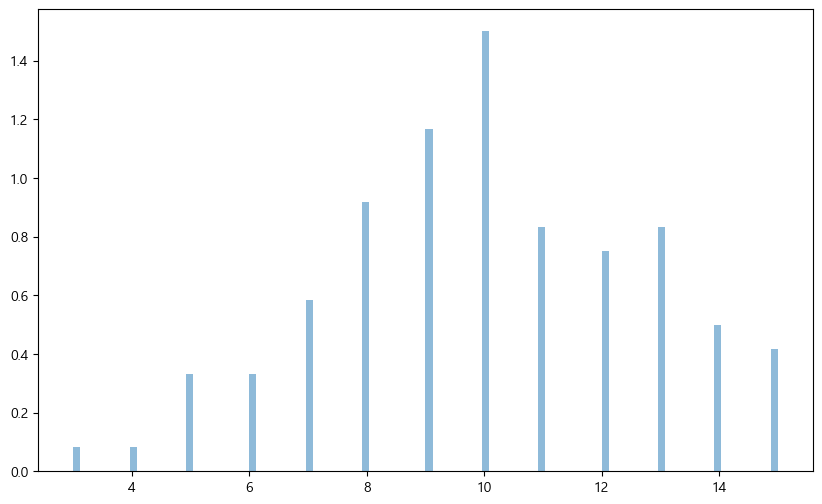

In [32]:
# Bin(100, 0.1)
rv = stats.binom(100, 0.1)
mo = rv.rvs(100)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.hist(mo, bins = 100, density = True, alpha = 0.5)

plt.show()

In [52]:
# 사례 2

# 모집단 100행 1000열로 랜덤 추출하기
sample = np.random.randint(1000, size = (100, 1000))
sample

array([[520, 905, 880, ..., 813, 995, 847],
       [252,  30, 343, ..., 582, 399, 600],
       [196, 996, 835, ..., 950, 774,  49],
       ...,
       [841, 330, 249, ..., 284, 949, 580],
       [357, 770, 619, ..., 756, 343, 768],
       [448, 812, 803, ...,  80,  94, 967]])

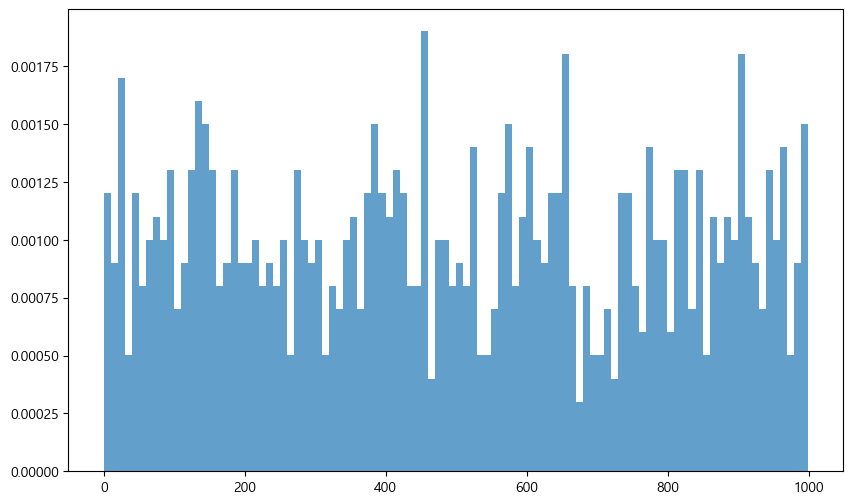

In [53]:
# 모집단 그래프 출력하기
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample[0], bins = 100, density = True, alpha = 0.7)
plt.show()

In [55]:
# 행별로 평균내기
means = np.array(np.mean(sample, axis = 0))
means.shape

(1000,)

In [58]:
sample1 = sample.reshape(1, -1)
mean = np.mean(sample1)
var = np.var(sample1)
mean, var

(498.788, 83943.012)

In [57]:
sample

array([[520, 905, 880, ..., 813, 995, 847],
       [252,  30, 343, ..., 582, 399, 600],
       [196, 996, 835, ..., 950, 774,  49],
       ...,
       [841, 330, 249, ..., 284, 949, 580],
       [357, 770, 619, ..., 756, 343, 768],
       [448, 812, 803, ...,  80,  94, 967]])

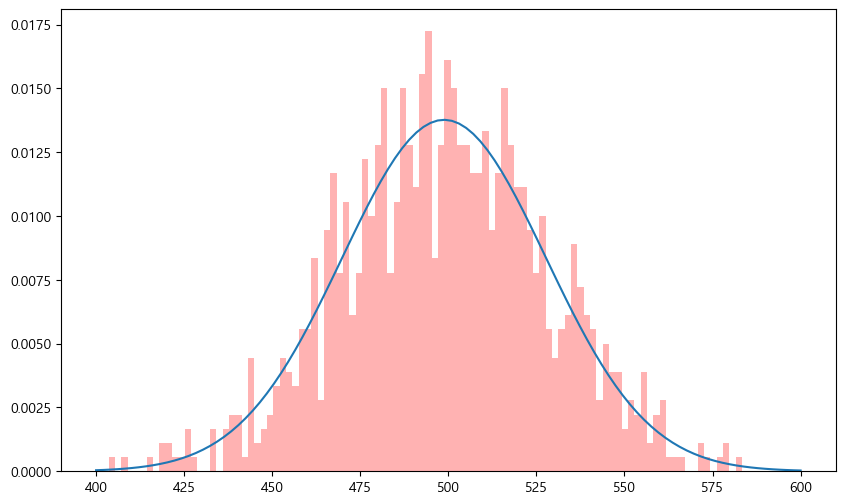

In [71]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(means, bins = 100, density=True, color = 'red', alpha = 0.3)
xs = np.linspace(400, 600, 100)
rv = stats.norm(mean, np.sqrt(var/100))
ax.plot(xs, rv.pdf(xs))
plt.show()

=> 정규분포의 모양을 이룸

- 대수의 법칙